In [20]:
import fwiVis.fwiVis as fv
import s3fs
s3 = s3fs.S3FileSystem(anon=False)
from math import cos, asin, sqrt
import re

import numpy as np
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
import os
import rioxarray as rio
import xarray as xr
import rasterio
import glob
from geocube.api.core import make_geocube
from shapely.errors import ShapelyDeprecationWarning
from shapely.geometry import Point
import warnings
import folium
import datetime
import time
from folium import plugins
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

import contextily as cx

In [21]:
snap = fv.prep_gdf(date = '20230720AM',layer='perimeter',handle_multi=False,
                   only_lf=False,
                   area_lim=4.7, 
                   year = "2023", 
                   path_region = "ItalyGreeceNRT_DPS")

/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test = gdf ## Default crs seems to be easting and westing in just US. reproject to lat vs lon
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [22]:
snap.explore()

(34.0, 38.0)

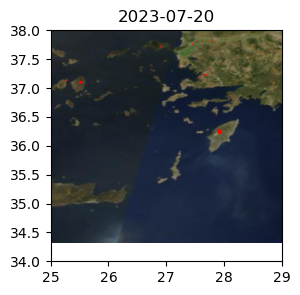

In [8]:
ax = snap.plot(figsize=(5.3,3), facecolor="red", edgecolor="red") #53.33333,30
cx.add_basemap(ax,
                crs=snap.crs.to_string(), 
                source= "https://map1.vis.earthdata.nasa.gov/wmts-webmerc/MODIS_Terra_CorrectedReflectance_TrueColor/default/2023-07-20/GoogleMapsCompatible_Level9/{z}/{y}/{x}.jpg")
                #source=cx.providers.NASAGIBS.ModisTerraAOD) #  zoom = 10
ax.set_title(str(*snap.t.astype('str').unique()))
#ax.set_title("")
#ax.spines['bottom'].set_color('white')
#ax.spines['top'].set_color('white')
#ax.xaxis.label.set_color('white')
#ax.tick_params(colors='white')
ax.set_xlim(25, 29) #[-126.401171875,24.071240929282325,-61.36210937500001,49.40003415463647])
ax.set_ylim(34, 38)
#plt.savefig('/projects/old_shared/fire_weather_vis/CONUS_figs/CONUS_july_snaps' + d +'.png', dpi=100, transparent=True)


In [10]:
date_range = pd.date_range(start = "2023-07-15 12:00:00", end = "2023-07-24 00:00:00", freq="12H")
#date_range_format = datetime.strptime(date_rage, 
date_snap = date_range.strftime("%Y%m%d%p")
date_snap
nice_dates = date_range.strftime("%Y-%m-%d %p")
query_dates = date_range.strftime("%Y-%m-%d")

20230715PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


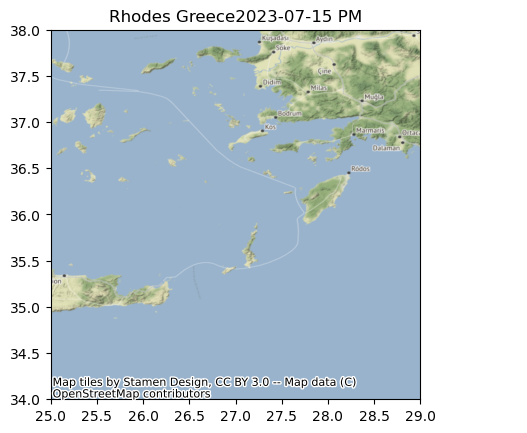

20230716AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


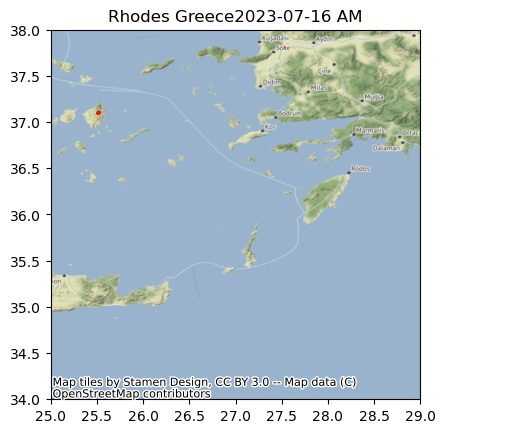

20230716PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


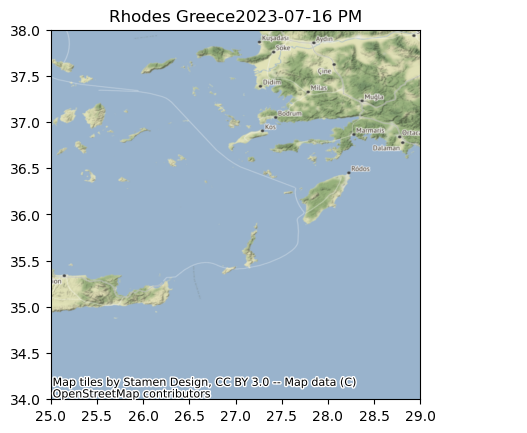

20230717AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


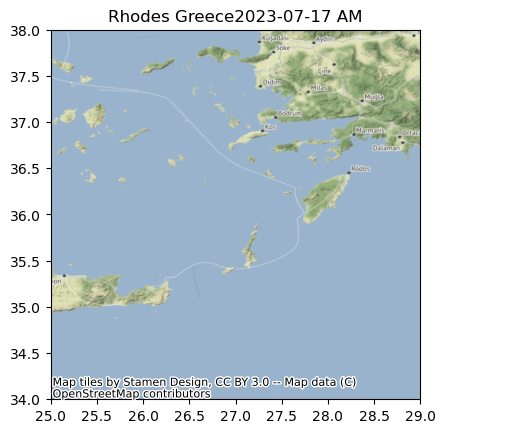

20230717PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


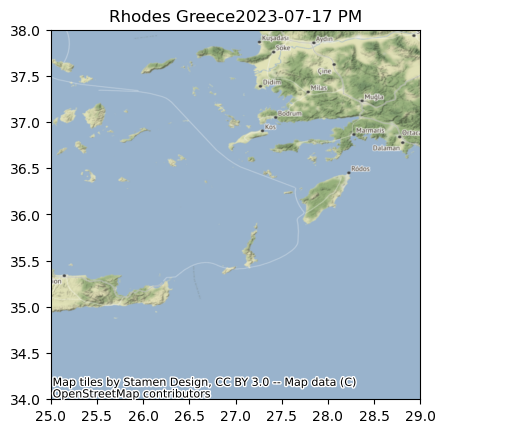

20230718AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


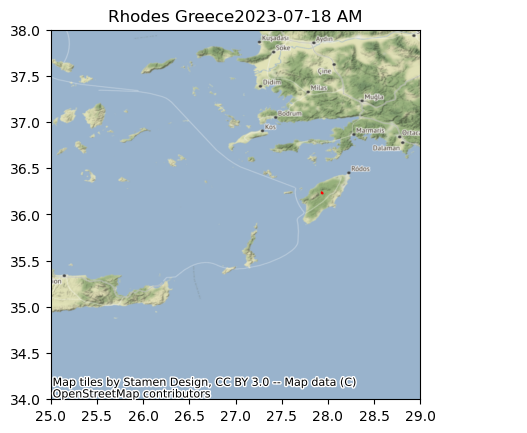

20230718PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


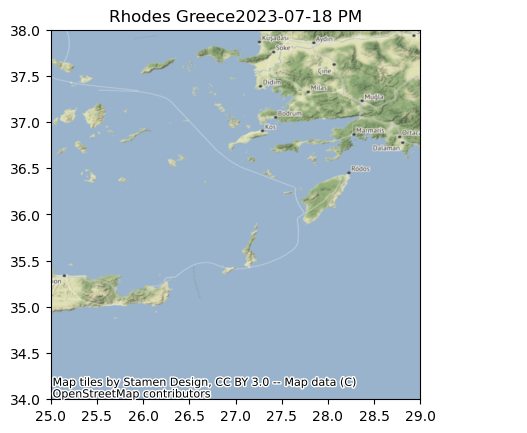

20230719AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


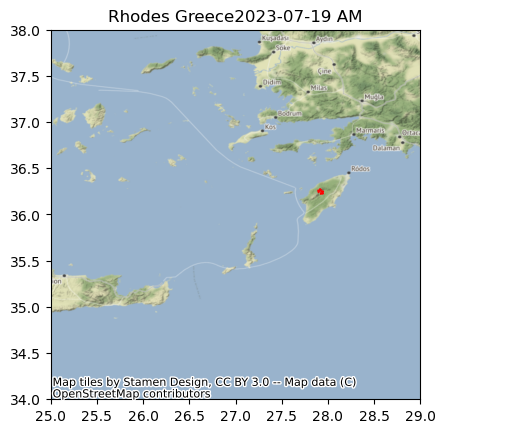

20230719PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


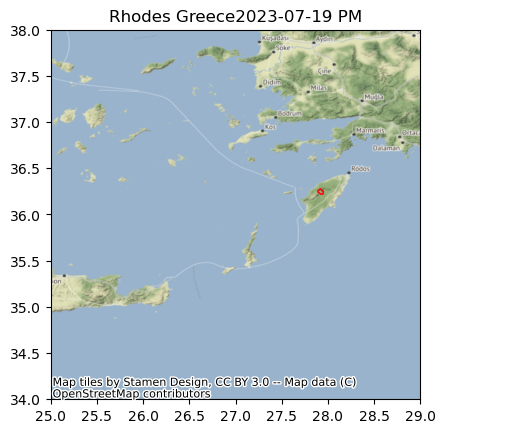

20230720AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


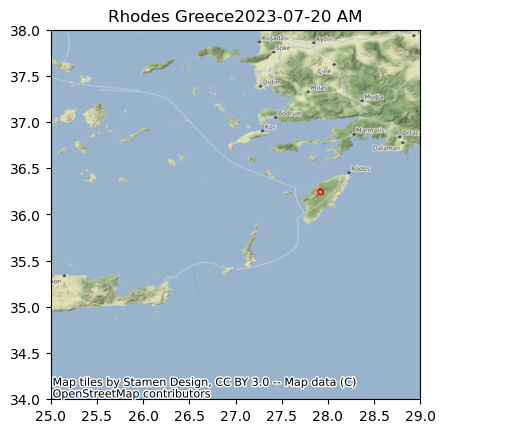

20230720PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


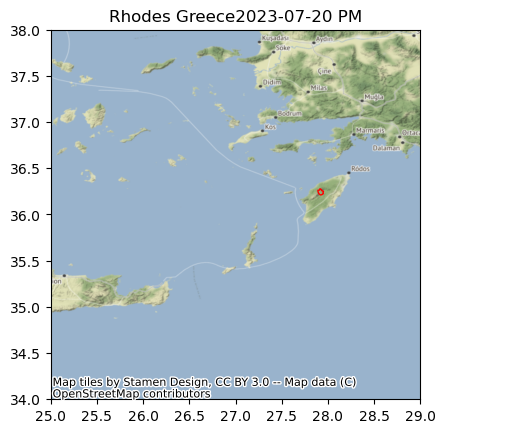

20230721AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


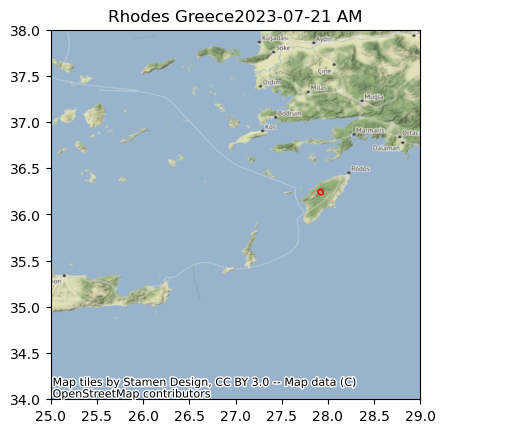

20230721PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


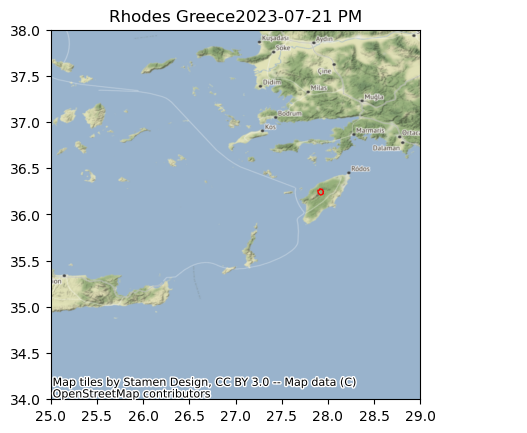

20230722AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


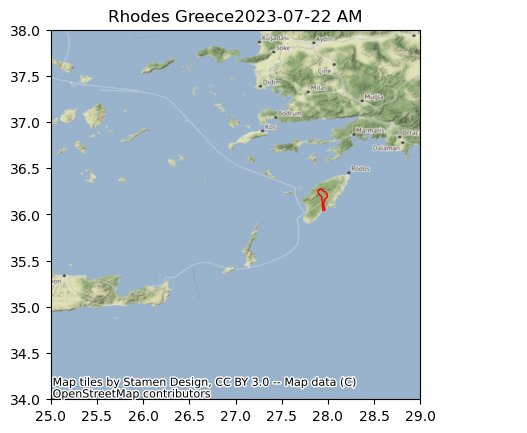

20230722PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


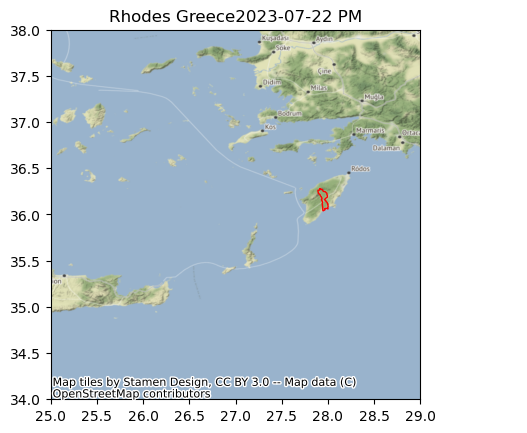

20230723AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


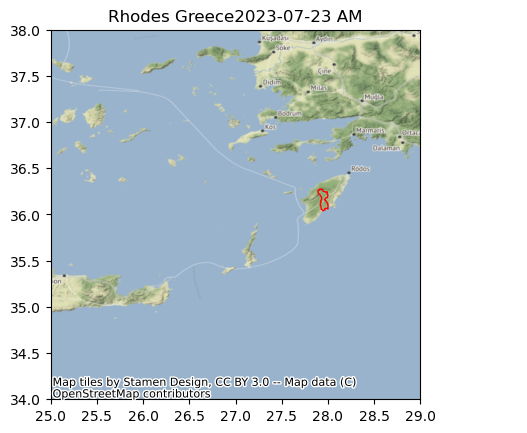

20230723PM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


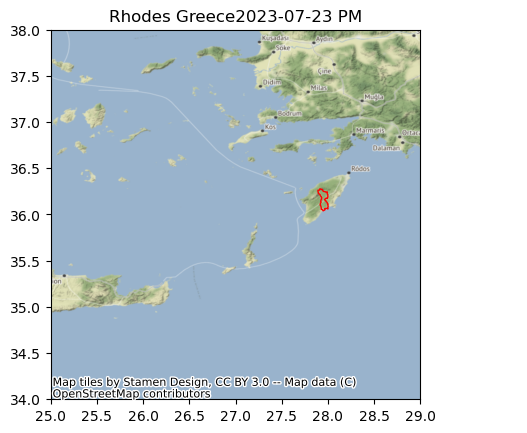

20230724AM


/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:490: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lon'] = gdf_test.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:491: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_test['lat'] = gdf_test.centroid.y


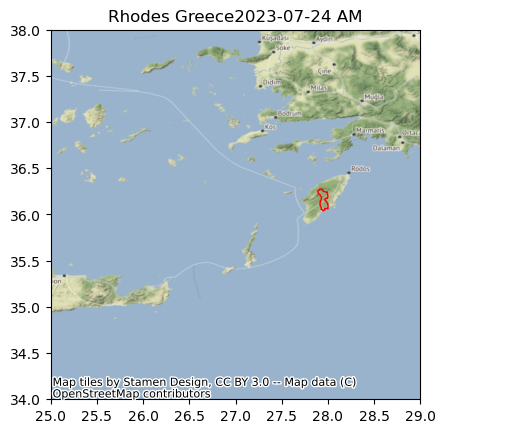

In [12]:
for d,n,q in zip(date_snap,nice_dates, query_dates) :
    print(d)
    snap = fv.prep_gdf(date = d,layer='perimeter',
                       handle_multi=False,
                       only_lf=False,area_lim=5, year = "2023", path_region = "ItalyGreeceNRT_DPS")
    #snap[ (snap.geom_type != 'MultiPolygon')]
    snap = snap[snap.n_newpixels > 0]
    plt.figure()

    ax = plt.subplot() 

    plot = snap.plot(ax = ax, figsize=(5,5), facecolor="none", edgecolor="red")
    ax.set_xlim(25, 29) #[-126.401171875,24.071240929282325,-61.36210937500001,49.40003415463647])
    ax.set_ylim(34, 38)
    
    #ax.set_xlim(-126.4, -61.36) #[-126.401171875,24.071240929282325,-61.36210937500001,49.40003415463647])
    #ax.set_ylim(24.07, 49.40)
    #ax.set_xlim(-124.88, -123) #[-126.401171875,24.071240929282325,-61.36210937500001,49.40003415463647])
    #ax.set_ylim(41.9, 43.4)
    cx.add_basemap(plot,
                crs=snap.crs.to_string())#, 
                #source= "https://map1.vis.earthdata.nasa.gov/wmts-webmerc/MODIS_Terra_CorrectedReflectance_TrueColor/default/" + q + "/GoogleMapsCompatible_Level9/{z}/{y}/{x}.jpg") #source=cx.providers.NASAGIBS.ModisTerraTrueColorCR
    ax.set_title( "Rhodes Greece" + n)
    #ax.spines['bottom'].set_color('white')
    #ax.spines['top'].set_color('white')
    #ax.xaxis.label.set_color('white')
    #ax.tick_params(colors='white')
    #plt.savefig('/projects/old_shared/fire_weather_vis/flats_fire/modis_flats_' + d +'.png', dpi=100, transparent=True)
    
    plt.show()

In [6]:
## Plot the flats fire as a largefire




#print(d)
snap = fv.load_large_fire(fireID = '1854', year='2023', path_region="ItalyGreeceNRT_DPS" )
#snap[ (snap.geom_type != 'MultiPolygon')]
# snap = snap[snap.n_newpixels > 0]
# plt.figure()

# ax = plt.subplot() 

# plot = snap.plot(ax = ax, figsize=(16, 9), facecolor="none", edgecolor="red")


# ax.set_xlim(-126.4, -61.36) #[-126.401171875,24.071240929282325,-61.36210937500001,49.40003415463647])
# ax.set_ylim(24.07, 49.40)
# cx.add_basemap(plot,
#             crs=snap.crs.to_string(), source= "https://map1.vis.earthdata.nasa.gov/wmts-webmerc/MODIS_Terra_CorrectedReflectance_TrueColor/default/" + q + "/GoogleMapsCompatible_Level9/{z}/{y}/{x}.jpg") #source=cx.providers.NASAGIBS.ModisTerraTrueColorCR
# ax.set_title(n)
# #plt.savefig('/projects/my-public-bucket/fire_weather_vis/base-fwi-vis/quebec/openstreet_quebec_snap_' + d +'.png', dpi=400)
# plt.show()

['/projects/shared-buckets/gsfc_landslides/FEDSoutput-s3-conus/ItalyGreeceNRT_DPS/2023/Largefire/F1854_20230719AM', '/projects/shared-buckets/gsfc_landslides/FEDSoutput-s3-conus/ItalyGreeceNRT_DPS/2023/Largefire/F1854_20230719PM', '/projects/shared-buckets/gsfc_landslides/FEDSoutput-s3-conus/ItalyGreeceNRT_DPS/2023/Largefire/F1854_20230720AM', '/projects/shared-buckets/gsfc_landslides/FEDSoutput-s3-conus/ItalyGreeceNRT_DPS/2023/Largefire/F1854_20230720PM', '/projects/shared-buckets/gsfc_landslides/FEDSoutput-s3-conus/ItalyGreeceNRT_DPS/2023/Largefire/F1854_20230721AM', '/projects/shared-buckets/gsfc_landslides/FEDSoutput-s3-conus/ItalyGreeceNRT_DPS/2023/Largefire/F1854_20230721PM', '/projects/shared-buckets/gsfc_landslides/FEDSoutput-s3-conus/ItalyGreeceNRT_DPS/2023/Largefire/F1854_20230722AM', '/projects/shared-buckets/gsfc_landslides/FEDSoutput-s3-conus/ItalyGreeceNRT_DPS/2023/Largefire/F1854_20230722PM', '/projects/shared-buckets/gsfc_landslides/FEDSoutput-s3-conus/ItalyGreeceNRT_DP

/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:567: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['lon'] = gdf.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:568: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['lat'] = gdf.centroid.y


In [ ]:
?fv.load_large_fire

['/projects/shared-buckets/gsfc_landslides/FEDSoutput-s3-conus/ItalyGreeceNRT_DPS/2023/Largefire/F1854_20230719AM', '/projects/shared-buckets/gsfc_landslides/FEDSoutput-s3-conus/ItalyGreeceNRT_DPS/2023/Largefire/F1854_20230719PM', '/projects/shared-buckets/gsfc_landslides/FEDSoutput-s3-conus/ItalyGreeceNRT_DPS/2023/Largefire/F1854_20230720AM', '/projects/shared-buckets/gsfc_landslides/FEDSoutput-s3-conus/ItalyGreeceNRT_DPS/2023/Largefire/F1854_20230720PM', '/projects/shared-buckets/gsfc_landslides/FEDSoutput-s3-conus/ItalyGreeceNRT_DPS/2023/Largefire/F1854_20230721AM', '/projects/shared-buckets/gsfc_landslides/FEDSoutput-s3-conus/ItalyGreeceNRT_DPS/2023/Largefire/F1854_20230721PM', '/projects/shared-buckets/gsfc_landslides/FEDSoutput-s3-conus/ItalyGreeceNRT_DPS/2023/Largefire/F1854_20230722AM', '/projects/shared-buckets/gsfc_landslides/FEDSoutput-s3-conus/ItalyGreeceNRT_DPS/2023/Largefire/F1854_20230722PM', '/projects/shared-buckets/gsfc_landslides/FEDSoutput-s3-conus/ItalyGreeceNRT_DP

/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:567: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['lon'] = gdf.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:568: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['lat'] = gdf.centroid.y


<AxesSubplot: >

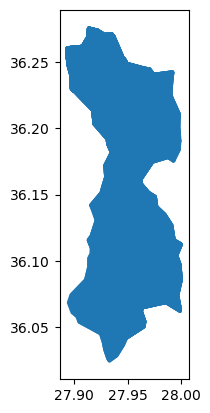

In [15]:

snap = fv.load_large_fire(fireID = '1854', year='2023', path_region="ItalyGreeceNRT_DPS" )

snap.plot()

In [16]:

snap.to_file('/projects/old_shared/rhodes/rhodes_fire_perimeters.geojson', driver='GeoJSON')


snap.t = snap.t.dt.strftime("%Y-%m-%d")
snap.to_file("/projects/old_shared/rhodes/rhodes_fire_perimeters.shp")

/tmp/ipykernel_9149/4141463394.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  snap.to_file("/projects/old_shared/rhodes/rhodes_fire_perimeters.shp")


['/projects/shared-buckets/gsfc_landslides/FEDSoutput-s3-conus/ItalyGreeceNRT_DPS/2023/Largefire/F1854_20230719AM', '/projects/shared-buckets/gsfc_landslides/FEDSoutput-s3-conus/ItalyGreeceNRT_DPS/2023/Largefire/F1854_20230719PM', '/projects/shared-buckets/gsfc_landslides/FEDSoutput-s3-conus/ItalyGreeceNRT_DPS/2023/Largefire/F1854_20230720AM', '/projects/shared-buckets/gsfc_landslides/FEDSoutput-s3-conus/ItalyGreeceNRT_DPS/2023/Largefire/F1854_20230720PM', '/projects/shared-buckets/gsfc_landslides/FEDSoutput-s3-conus/ItalyGreeceNRT_DPS/2023/Largefire/F1854_20230721AM', '/projects/shared-buckets/gsfc_landslides/FEDSoutput-s3-conus/ItalyGreeceNRT_DPS/2023/Largefire/F1854_20230721PM', '/projects/shared-buckets/gsfc_landslides/FEDSoutput-s3-conus/ItalyGreeceNRT_DPS/2023/Largefire/F1854_20230722AM', '/projects/shared-buckets/gsfc_landslides/FEDSoutput-s3-conus/ItalyGreeceNRT_DPS/2023/Largefire/F1854_20230722PM', '/projects/shared-buckets/gsfc_landslides/FEDSoutput-s3-conus/ItalyGreeceNRT_DP

/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:567: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['lon'] = gdf.centroid.x
/projects/old_shared/fire_weather_vis/base-fwi-vis/fwiVis/fwiVis.py:568: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['lat'] = gdf.centroid.y


(array([19556., 19557., 19558., 19559., 19560., 19561., 19562., 19563.]),
 [Text(19556.0, 0, '2023-07-18'),
  Text(19557.0, 0, '2023-07-19'),
  Text(19558.0, 0, '2023-07-20'),
  Text(19559.0, 0, '2023-07-21'),
  Text(19560.0, 0, '2023-07-22'),
  Text(19561.0, 0, '2023-07-23'),
  Text(19562.0, 0, '2023-07-24'),
  Text(19563.0, 0, '2023-07-25')])

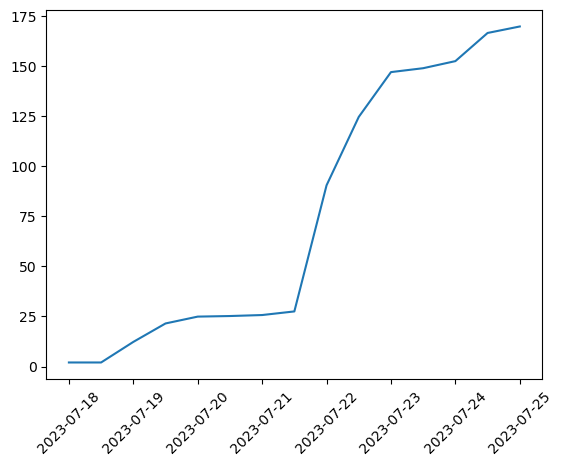

In [19]:
snap = fv.load_large_fire(fireID = '1854', year='2023', path_region="ItalyGreeceNRT_DPS" )

snap = snap.sort_values(by = ["t"])
plt.plot(snap.t, snap.farea)
plt.xticks(rotation = 45)

